<a href="https://colab.research.google.com/github/Sid-9823/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <u>**Project Title : Netflix Movies and TV Shows Clustering**</u>
#####**Project Type** - Unsupervised

#####**Contribution** - Individual

#####**Individual name** - Siddhant Pal

#####**Cohort** - Berlin

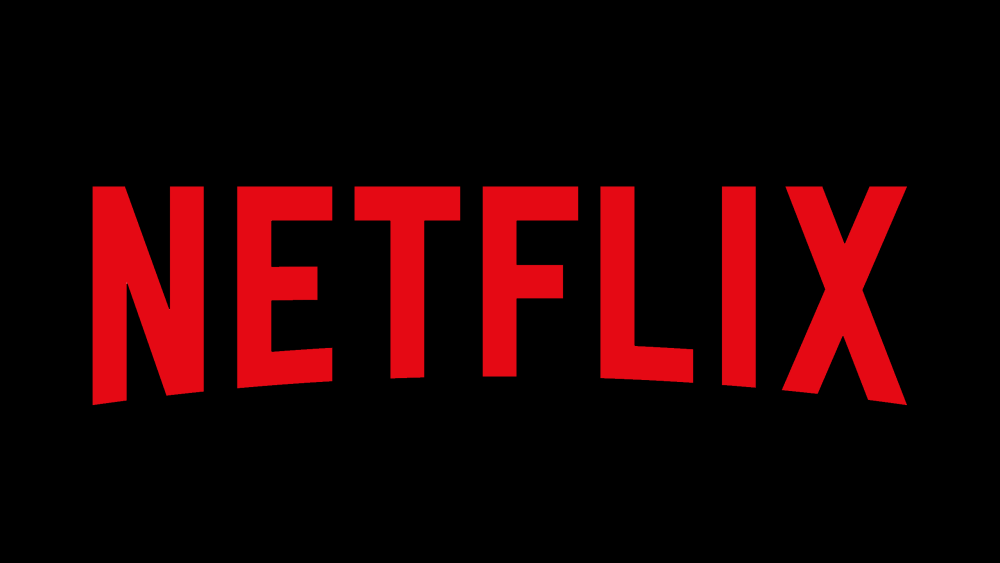

#**Project Summary**

#**GitHub Link**

https://github.com/Sid-9823/Netflix-Movies-and-TV-Shows-Clustering.git

#**Problem statement**

###**BUSINESS PROBLEM OVERVIEW**

**This dataset contains TV series and films that are currently accessible on Netflix as of 2019. The data was gathered through Flixable, a third-party Netflix search engine.**

**In 2018, they published an intriguing analysis revealing that the amount of TV series available on Netflix has almost tripled since 2010. Since 2010, the number of films on the streaming service has declined by almost 2,000 titles, while the number of TV episodes has almost tripled. It will be fascinating to see what additional insights can be extracted from the same information.**

**By matching text-based characteristics, we will cluster comparable material.**


### **Data Description**

**The dataset contains TV series and movies information such as show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in and description.**

**Feature's Information :**
* ***show_id*** : *Unique ID for every Movie / Tv Show.*

* ***type*** : *Identifier - A Movie or TV Show.*
* ***title*** : *Title of the movie / show.*
* ***Director*** : *Director of the show*
* ***cast*** : *Actors involved.*
* ***Country*** : *Country of production.*
* ***date_added*** : *Date it was added on Netflix.*
* ***release_year*** : *Actual release year of the show.*
* ***rating*** : *TV rating of the show.*
* ***duration*** : *Total duration in minutes or number of seasons.*
* ***listed_in*** : *Genre.*
* ***Description*** : *The summary description.*

#**Importing necessary libraries**

In [98]:
# Importing Numpy & Pandas for data processing & data wrangling.

import numpy as np
import pandas as pd

# Importing tools for visualization.

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing libraries for Hypothesis testing.

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library.

from wordcloud import WordCloud, STOPWORDS

# Libraries used for textual data preprocessing.

import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Libraries used for Clustering.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Libraries used for building recommendation system.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Data collection and analysis**

##**Data Loading and Basic Analysis**

In [99]:
# Loading the data from csv file to a pandas dataframe.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [100]:
# Printing first 5 rows.

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [101]:
 # Printing last 5 rows.

df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [102]:
# Checking the number of rows and columns in our dataset.

df.shape

(7787, 12)

In [103]:
# Gathering information about our dataset such as null count values and data types involved.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [104]:
# Printing number of unique values in our dataset.

df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [105]:
# Checking null values.

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

* ***As we can see there are missing values in director, cast, country, date_added and rating column in this dataframe.***

##**Data wrangling**

In [106]:
# Renaming our column's.

df = df.rename(columns={'show_id':'si','type':'typ','title':'tit','director':'dtr','cast':'cst','country':'cnt',
                        'date_added':'da','release_year':'ry','rating':'rtng','duration':'dur','listed_in':'li','description':'des'})

* ***Changing column's names as per our convenience as it becomes easier working with small feature names.***

In [107]:
# Handling Null values.

df['cst'].fillna(value = 'Unavailable',inplace = True)

df['cnt'].fillna(value = df['cnt'].mode()[0],inplace = True)

* ***In our 'Cast' column, we are filling our null cells with the 'Unavailable'.***

* ***In 'Country' column, we are filling out null cells with the mode of the column.***

In [108]:
# Dropping missing values.

df.dropna(subset = ['rtng','da'],inplace = True)

* ***Dropping missing values from 'rating' and 'date_added' column as there are very few null cells in these columns.***

In [109]:
# Dropping 'director' column.

df.drop(['dtr'],inplace = True, axis = 1)

* ***Dropping 'director' column as it's missing more than 30% values in it.***

In [110]:
# Checking for null values after handling them.

df.isnull().sum()

si      0
typ     0
tit     0
cst     0
cnt     0
da      0
ry      0
rtng    0
dur     0
li      0
des     0
dtype: int64

* ***As we can see, there are no null values present in our dataset now.***

# **Exploratory Data Analysis and Visualization**

**What is EDA ?**

***Exploratory Data Analysis can be considered as a process which is used to visualise data and it helps to uncover the underlying pattern and relations between the dependent and independent variable's which can be useful in decision making.***

###**type**

Text(0.5, 1.0, 'Number of TV Shows and Movies in our dataset')

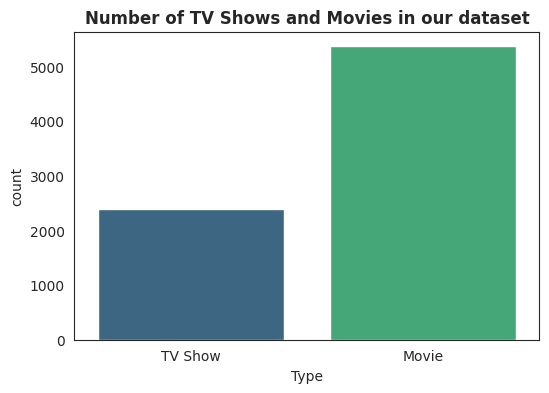

In [111]:
# Plotting a countplot for this column.

sns.set_style(style='white')
plt.figure(figsize=(6,4))
sns.countplot(x = df['typ'],palette='viridis')
plt.xlabel('Type')
plt.title('Number of TV Shows and Movies in our dataset',fontweight = 'bold')

* ***As we can see in the above countplot that there are more number of movies in our dataset as compared to TV shows.***

In [112]:
# Number of entries in each category.

df['typ'].value_counts()

Movie      5372
TV Show    2398
Name: typ, dtype: int64

* ***There are 5372 movies and 2398 TV shows present in our dataset.***

###**Country**

In [113]:
# Creating separate two variables for TV Shows and Movies.

mov = df[df['typ'] == 'Movie']

tv =  df[df['typ'] == 'TV Show']

Text(0.5, 1.0, 'Top 10 countries with highest number of movies on the platform')

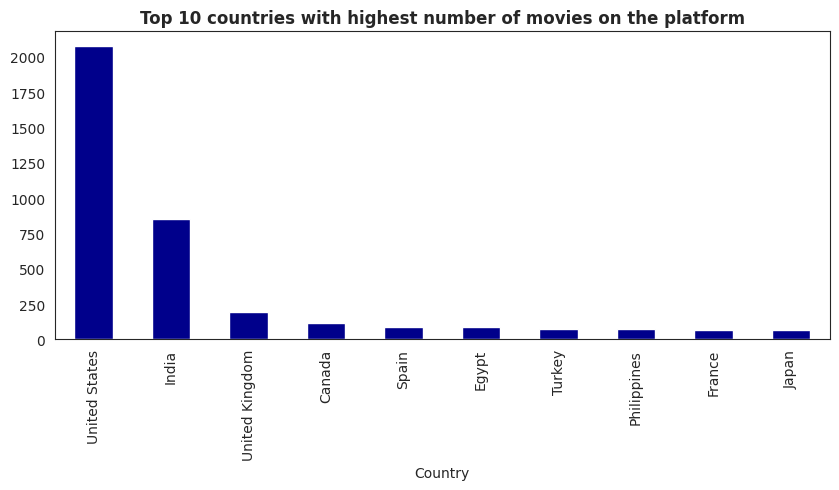

In [114]:
# Plotting a barplot.

plt.figure(figsize=(10,4))
mov['cnt'].value_counts().head(10).plot(kind = 'bar',color = 'darkblue')
plt.xlabel('Country')
plt.title('Top 10 countries with highest number of movies on the platform',fontweight = 'bold')

* ***United States has the highest number of Movies on Netflix followed by India, United Kingdom, Canada and several other countries.***

In [115]:
# Printing top 10 countries with highest number of movies.

mov['cnt'].value_counts().head(10)

United States     2076
India              852
United Kingdom     193
Canada             118
Spain               89
Egypt               89
Turkey              73
Philippines         70
France              69
Japan               69
Name: cnt, dtype: int64

* ***There are 2076 movie title's of United States on netflix followed by India with 852 titles along with several other countries.***

Text(0.5, 1.0, 'Top 10 countries with highest number of TV shows on the platform')

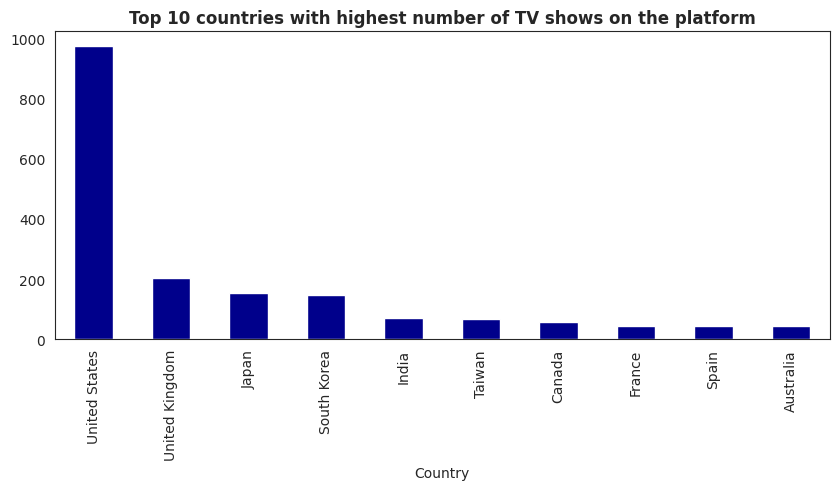

In [116]:
# Plotting a barplot.

plt.figure(figsize=(10,4))
tv['cnt'].value_counts().head(10).plot(kind = 'bar',color = 'darkblue')
plt.xlabel('Country')
plt.title('Top 10 countries with highest number of TV shows on the platform',fontweight = 'bold')

* ***United States still has the highest number of TV shows on Netflix followed by United Kingdom, Japan and several other countries.***

In [117]:
# Printing top 10 countries.

tv['cnt'].value_counts().head(10)

United States     975
United Kingdom    203
Japan             155
South Korea       147
India              71
Taiwan             68
Canada             59
France             46
Spain              45
Australia          44
Name: cnt, dtype: int64

* ***There are 975 TV shows of United States on netflix while followed by United Kingdom with 203 tv shows along with several other countries.***

###**rating**

Text(0.5, 1.0, 'Different ratings of movies on the platform')

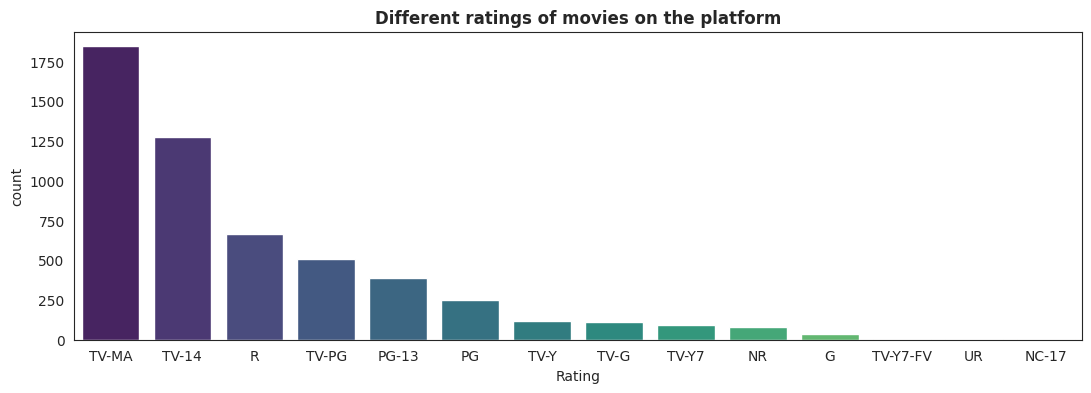

In [118]:
# Plotting a countplot.

plt.figure(figsize=(13,4))
sns.countplot(x = mov['rtng'], order = mov['rtng'].value_counts().index,palette = 'viridis')
plt.xlabel('Rating')
plt.title('Different ratings of movies on the platform',fontweight = 'bold')

* ***As we can observe by the above plot that majority of the movies on our platform is for TV - MA (Mature Audience) followed by TV - 14 (Content unsuitable for children under 14), R (Restricted to viewers over 17 years old) and several other categories.***

In [119]:
# Number of different entries.

mov['rtng'].value_counts()

TV-MA       1845
TV-14       1272
R            663
TV-PG        505
PG-13        386
PG           247
TV-Y         117
TV-G         111
TV-Y7         95
NR            79
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: rtng, dtype: int64

* ***There are 1845 movies of TV - MA rating followed by 1272 movies of TV - 14 rating with several other rating categories.***

Text(0.5, 1.0, 'Different ratings of TV Shows on the platform')

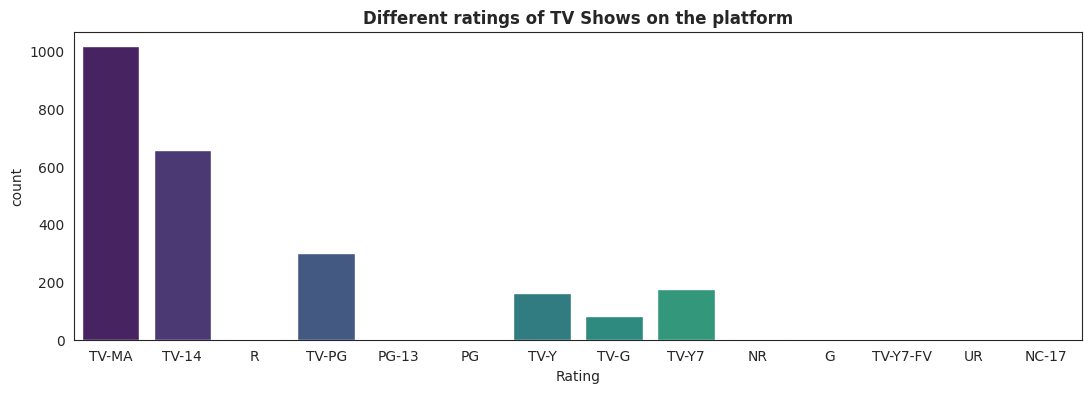

In [120]:
# Plotting a countplot.

plt.figure(figsize=(13,4))
sns.countplot(x = tv['rtng'], order = mov['rtng'].value_counts().index,palette = 'viridis')
plt.xlabel('Rating')
plt.title('Different ratings of TV Shows on the platform',fontweight = 'bold')

* ***TV Shows are also rated similar as the movies on the platform.***

In [121]:
# Number of different entries.

tv['rtng'].value_counts()

TV-MA       1016
TV-14        656
TV-PG        299
TV-Y7        175
TV-Y         162
TV-G          83
NR             4
R              2
TV-Y7-FV       1
Name: rtng, dtype: int64

* ***There are 1016 TV Shows of TV - MA rating followed by 656 TV Shows of TV - 14 rating with several other rating categories.***

###**duration**

Text(0.5, 1.0, 'Distribution of Movies duration (minutes)')

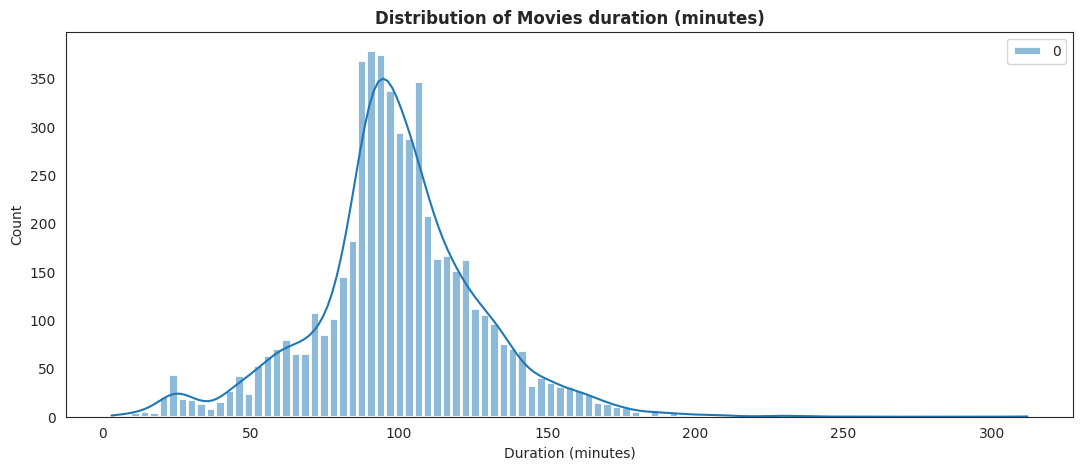

In [122]:
# Plotting a distribution plot.

plt.figure(figsize=(13,5))
sns.histplot(mov['dur'].str.extract('(\d+)').astype(int), kde = True, linewidth=2) # It is extracting digits from the mov['dur'] and plotting it.
plt.xlabel('Duration (minutes)')
plt.title('Distribution of Movies duration (minutes)', fontweight = 'bold')

* ***As we can observe in above distplot that it is following a near normal distribution.***

* ***It also means that majority of movies on the platform are of about 1.5 hr duration and can go upto 2.5 to 3 hr if max duration considered.***

Text(0.5, 1.0, 'Duration of TV shows (seasons)')

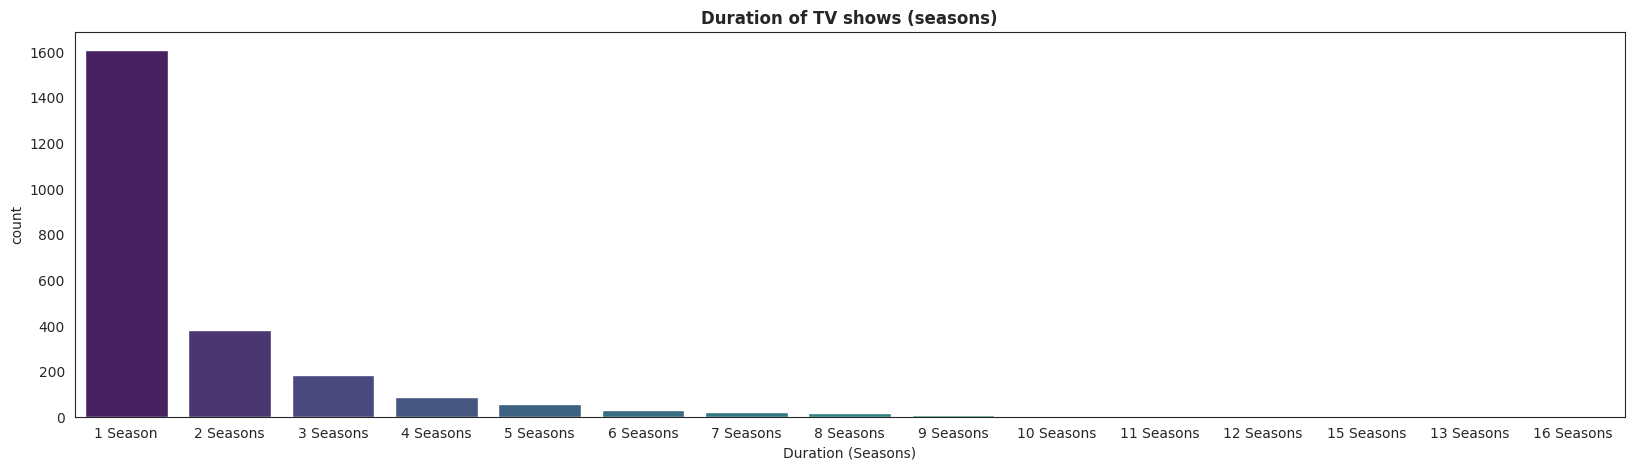

In [123]:
# Plotting a countplot.

plt.figure(figsize = (20,5))
sns.countplot(x = tv['dur'], order = tv['dur'].value_counts().index,palette = 'viridis')
plt.xlabel('Duration (Seasons)')
plt.title('Duration of TV shows (seasons)', fontweight = 'bold')

* ***Majority of TV Shows consist of 1 season on the platform while rest consist of 2 to 8 seasons.***

In [124]:
# Printing number of seasons.

tv['dur'].value_counts()

1 Season      1606
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
11 Seasons       2
12 Seasons       2
15 Seasons       2
13 Seasons       1
16 Seasons       1
Name: dur, dtype: int64

* ***There are 1606 TV shows of 1 season and 378 TV shows of 2 seasons following few other TV shows ranging upto 3 to 10 seasons.***

###**release_year**

Text(0.5, 1.0, 'Top 10 years in which highest movies were released')

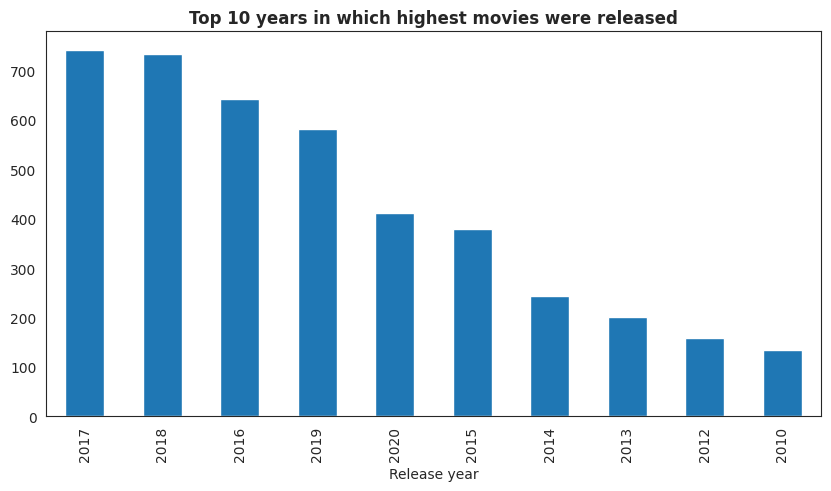

In [125]:
# Plotting a barplot.

plt.figure(figsize=(10,5))
mov['ry'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Release year')
plt.title('Top 10 years in which highest movies were released', fontweight = 'bold')

* ***Most movies were released in between 2017 - 2019.***

In [126]:
# Printing values.

mov['ry'].value_counts().head(15)

2017    742
2018    734
2016    642
2019    582
2020    411
2015    380
2014    244
2013    202
2012    158
2010    135
2011    127
2009    103
2008    102
2007     72
2006     72
Name: ry, dtype: int64

* ***These are the number of movies released in these respective year.***

Text(0.5, 1.0, 'Top 10 years in which highest TV Shows were released')

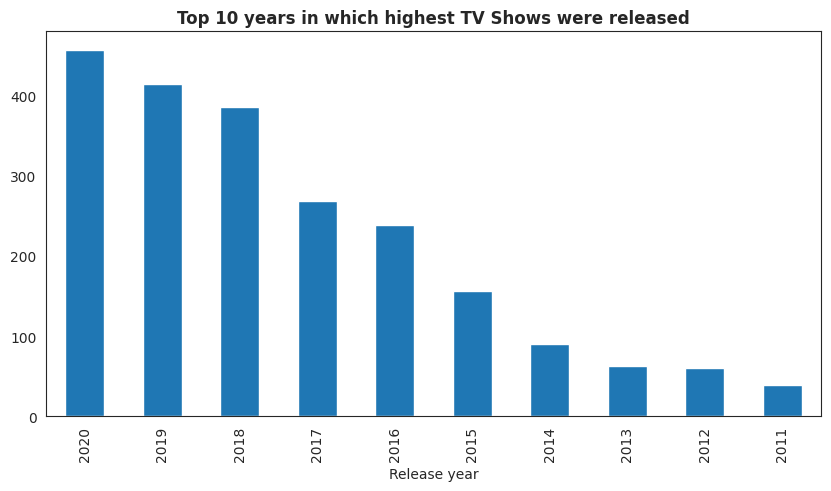

In [127]:
# Plotting a barplot.

plt.figure(figsize=(10,5))
tv['ry'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Release year')
plt.title('Top 10 years in which highest TV Shows were released', fontweight = 'bold')

* ***Most TV shows were released in between 2018 - 2020.***

In [128]:
# Printing values.

tv['ry'].value_counts().head(15)

2020    457
2019    414
2018    386
2017    268
2016    239
2015    156
2014     90
2013     63
2012     60
2011     39
2010     36
2009     34
2008     22
2021     19
2006     13
Name: ry, dtype: int64

* ***These are the number of TV shows released in these respective year.***

###**date_added**

In [215]:
# Converting strings to a datetime object.

movda = mov['da'].apply(lambda x : pd.to_datetime(x))
tvda  =  tv['da'].apply(lambda x : pd.to_datetime(x))

* ***Converting movie date added string to a datetime object and storing it in 'movda' variable.***

* ***Converting TV Shows date added string to a datetime object and storing it in 'tvda' variable.***

Text(0.5, 1.0, 'Most additions of movies on Netflix year-wise')

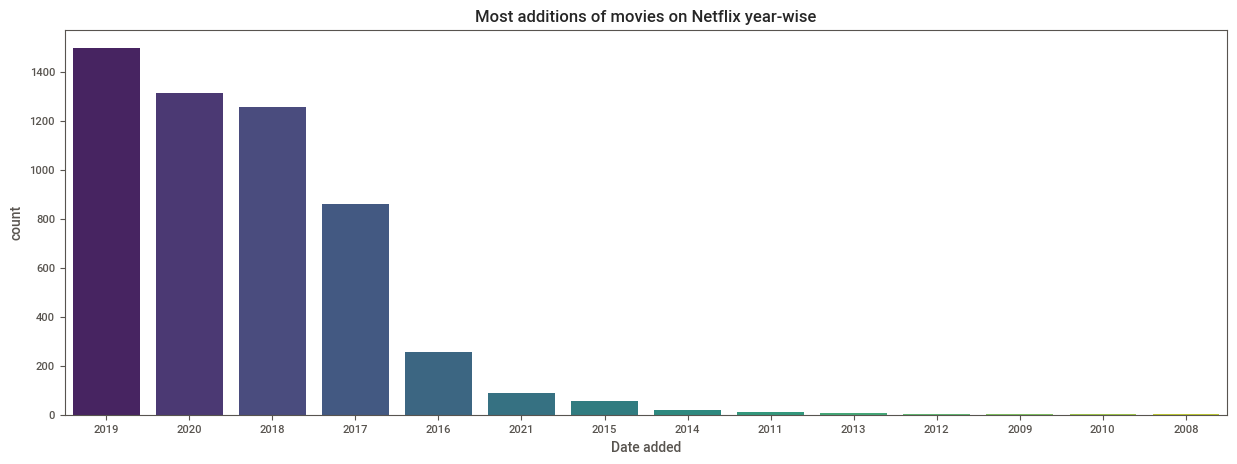

In [216]:
# Plotting a countplot.

plt.figure(figsize=(15,5))
sns.countplot(x = movda.dt.year, order = movda.dt.year.value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of movies on Netflix year-wise', fontweight = 'bold')

* ***Most movies were added in between 2017 - 2019.***

In [217]:
# Printing values.

movda.dt.year.value_counts()

2019    1497
2020    1312
2018    1255
2017     861
2016     256
2021      88
2015      58
2014      19
2011      13
2013       6
2012       3
2009       2
2010       1
2008       1
Name: da, dtype: int64

* ***These are the number of movies added in these respective year.***

Text(0.5, 1.0, 'Most additions of movies on Netflix month - wise')

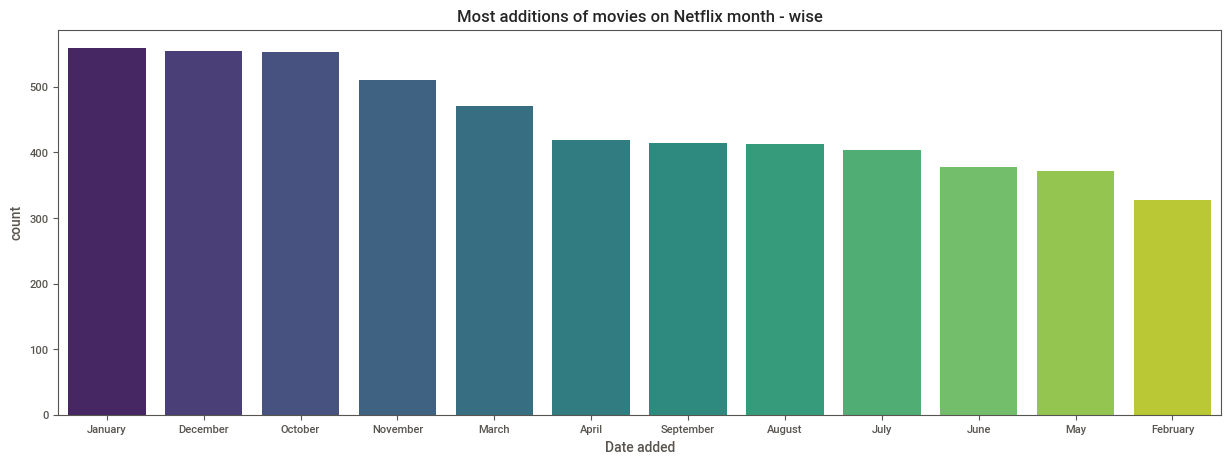

In [218]:
# Plotting a countplot.

plt.figure(figsize=(15,5))
sns.countplot(x = movda.dt.month_name(), order = movda.dt.month_name().value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of movies on Netflix month - wise', fontweight = 'bold')

* ***Most movies were added on the platform in January, December and October as during this time there are new year and christmas holidays so people have spare time.***

In [219]:
# Printing values.

movda.dt.month_name().value_counts()

January      559
December     554
October      553
November     511
March        470
April        419
September    414
August       413
July         403
June         377
May          371
February     328
Name: da, dtype: int64

* ***These are the number of movies added in these respective months.***

Text(0.5, 1.0, 'Most additions of movies on Netflix weekday - wise')

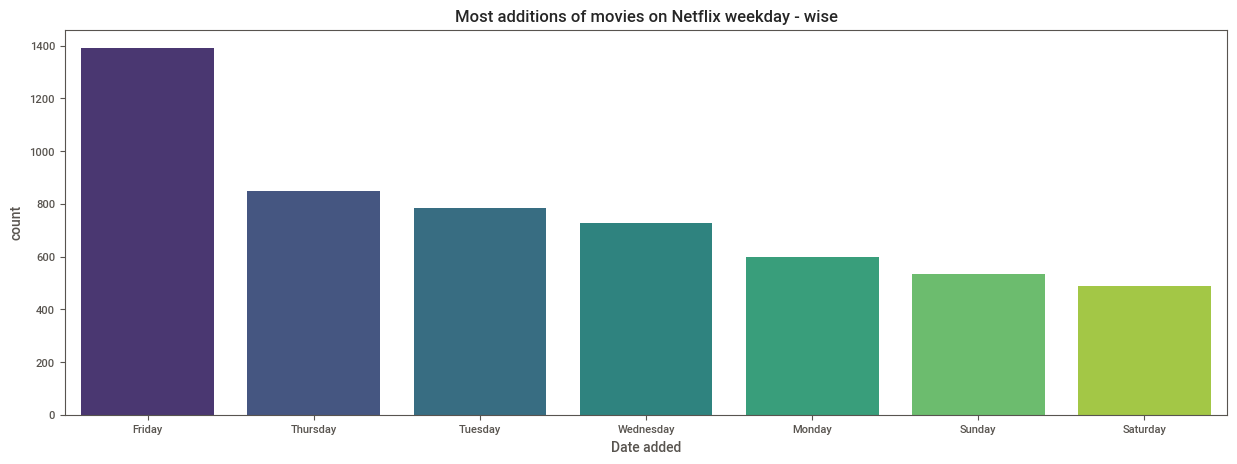

In [220]:
# Plotting a countplot.

plt.figure(figsize=(15,5))
sns.countplot(x = movda.dt.strftime("%A"), order = movda.dt.strftime("%A").value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of movies on Netflix weekday - wise', fontweight = 'bold')

* ***Most movies on the platform were added on Friday as it's the beginning of the weekend.***

In [221]:
# Printing values.

movda.dt.strftime("%A").value_counts()

Friday       1391
Thursday      847
Tuesday       784
Wednesday     726
Monday        599
Sunday        535
Saturday      490
Name: da, dtype: int64

* ***These are the number of movies added in these respective weekdays.***

Text(0.5, 1.0, 'Most additions of TV Shows on Netflix year-wise')

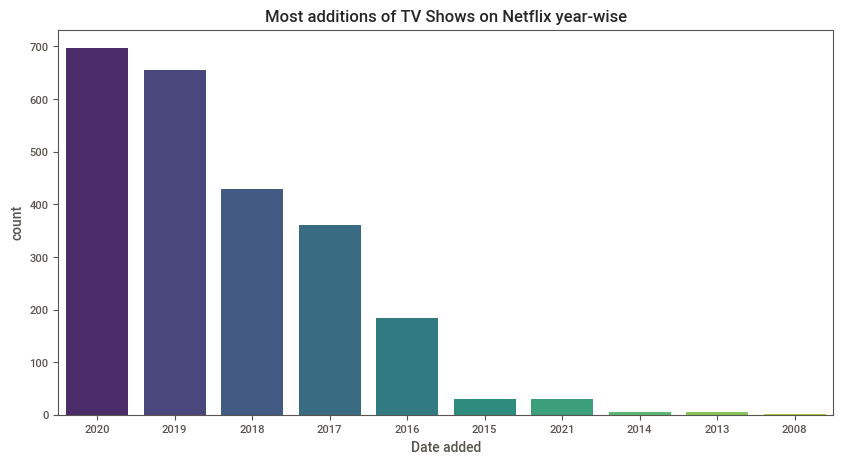

In [222]:
# Plotting a countplot.

plt.figure(figsize=(10,5))
sns.countplot(x = tvda.dt.year, order = tvda.dt.year.value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of TV Shows on Netflix year-wise', fontweight = 'bold')

* ***Most TV Shows were added in 2019 and 2020.***

* ***Apart from these, rest were added in between 2016 - 2018***

In [223]:
# Printing values.

tvda.dt.year.value_counts()

2020    697
2019    656
2018    429
2017    361
2016    184
2015     30
2021     29
2014      6
2013      5
2008      1
Name: da, dtype: int64

* ***These are the number of TV shows added in these respective year.***

Text(0.5, 1.0, 'Most additions of TV Shows on Netflix month - wise')

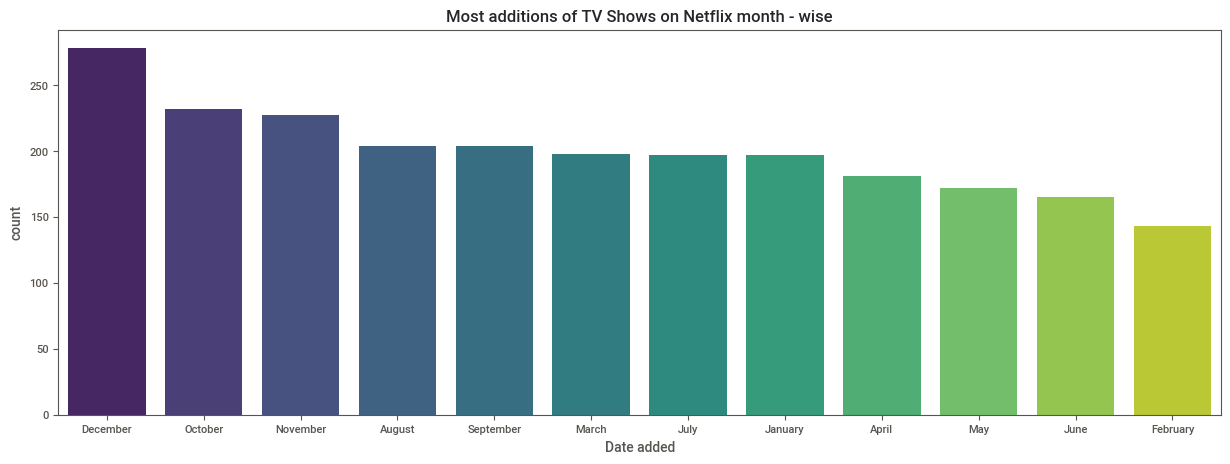

In [224]:
# Plotting a countplot.

plt.figure(figsize=(15,5))
sns.countplot(x = tvda.dt.month_name(), order = tvda.dt.month_name().value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of TV Shows on Netflix month - wise', fontweight = 'bold')

* ***Most TV shows were added on the platform in December, October and November.***

In [225]:
# Printing values.

tvda.dt.month_name().value_counts()

December     278
October      232
November     227
August       204
September    204
March        198
July         197
January      197
April        181
May          172
June         165
February     143
Name: da, dtype: int64

* ***These are the number of TV Shows added in these respective months.***

Text(0.5, 1.0, 'Most additions of TV Shows on Netflix weekday - wise')

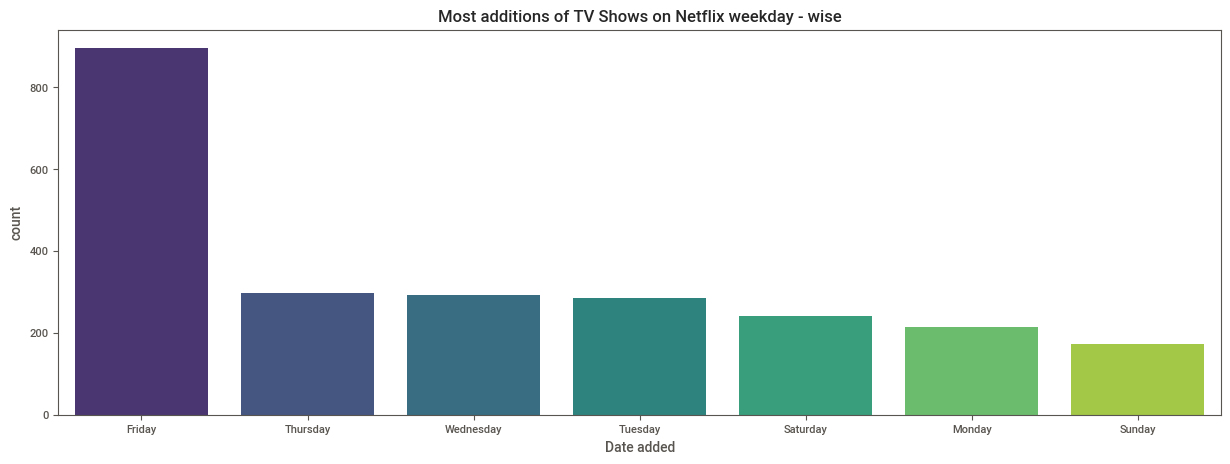

In [226]:
# Plotting a countplot.

plt.figure(figsize=(15,5))
sns.countplot(x = tvda.dt.strftime("%A"), order = tvda.dt.strftime("%A").value_counts().index,palette = 'viridis')
plt.xlabel('Date added')
plt.title('Most additions of TV Shows on Netflix weekday - wise', fontweight = 'bold')

* ***TV Shows are following the same trend as movies.***

* ***Most TV shows were added on platform on Friday.***

In [227]:
# Printing values.

tvda.dt.strftime("%A").value_counts()

Friday       895
Thursday     297
Wednesday    293
Tuesday      285
Saturday     241
Monday       214
Sunday       173
Name: da, dtype: int64

* ***These are the number of TV Shows added in these respective weekdays.***

###**listed_in**

Text(0.5, 1.0, 'Movies listed in different categories')

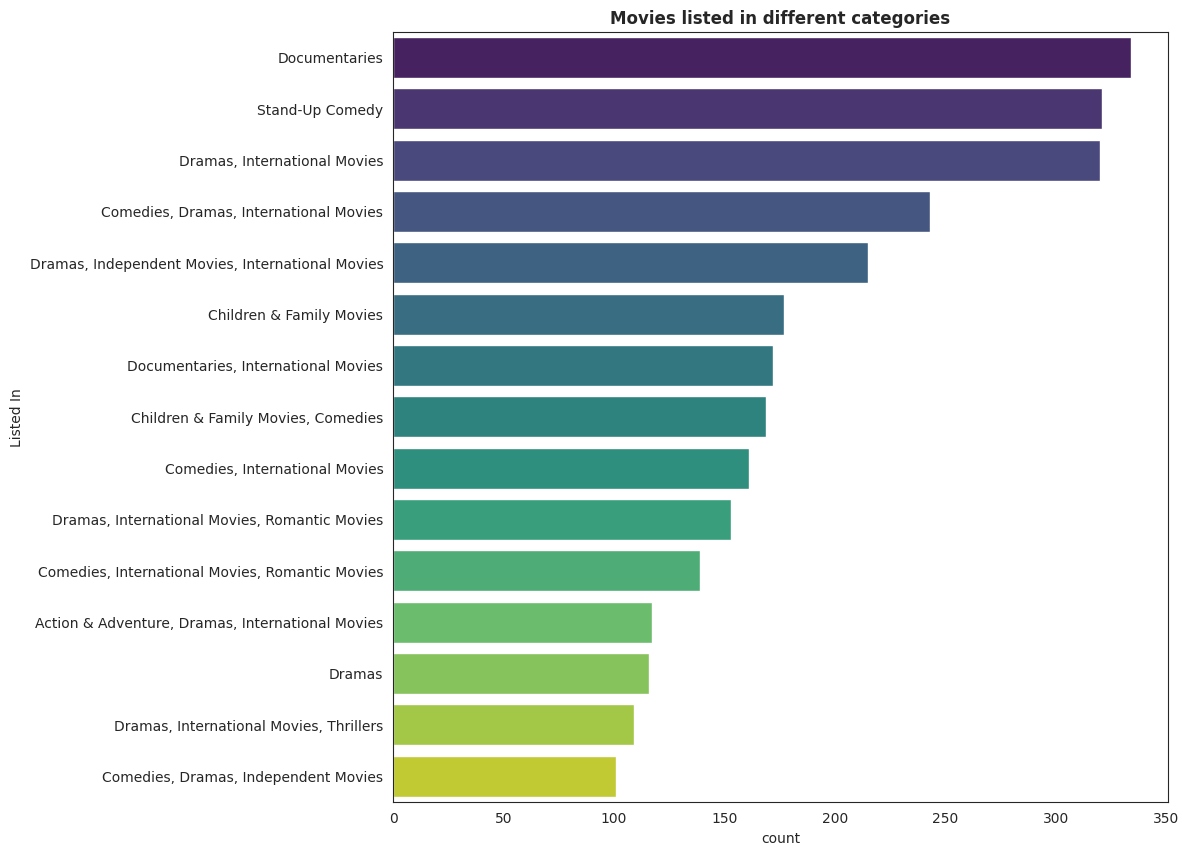

In [134]:
# Plotting a countplot.

plt.figure(figsize=(10,10))
sns.countplot(y = mov['li'], order = mov['li'].value_counts().head(15).index,palette = 'viridis')
plt.ylabel('Listed In')
plt.title('Movies listed in different categories',fontweight = 'bold')

* ***Majority of the movies on platform are documentaries.***

* ***Rest are related to stand-up comedy, International movies and Dramas genre.***

In [135]:
# Printing values.

mov['li'].value_counts().head(15)

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Dramas, International Movies, Romantic Movies       153
Comedies, International Movies, Romantic Movies     139
Action & Adventure, Dramas, International Movies    117
Dramas                                              116
Dramas, International Movies, Thrillers             109
Comedies, Dramas, Independent Movies                101
Name: li, dtype: int64

* ***These are the number of movies in different genre.***

Text(0.5, 1.0, 'TV Shows listed in different categories')

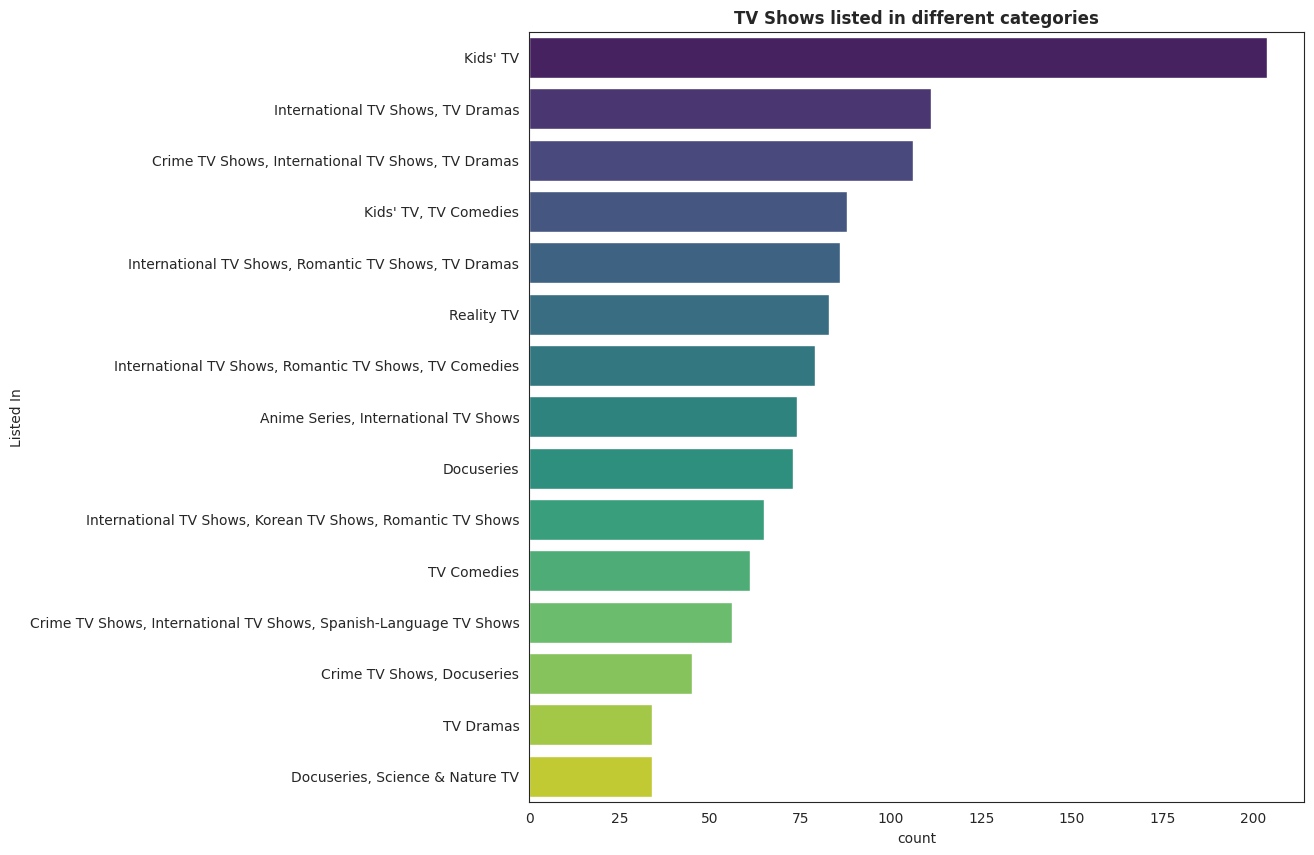

In [136]:
# Plotting a countplot.

plt.figure(figsize=(10,10))
sns.countplot(y = tv['li'], order = tv['li'].value_counts().head(15).index,palette = 'viridis')
plt.ylabel('Listed In')
plt.title('TV Shows listed in different categories',fontweight = 'bold')

* ***Majority of the TV shows on platform are of kids related genre.***

* ***Rest are related to Crime, International and Dramas genre.***

In [137]:
# Printing values.

tv['li'].value_counts().head(15)

Kids' TV                                                             204
International TV Shows, TV Dramas                                    111
Crime TV Shows, International TV Shows, TV Dramas                    106
Kids' TV, TV Comedies                                                 88
International TV Shows, Romantic TV Shows, TV Dramas                  86
Reality TV                                                            83
International TV Shows, Romantic TV Shows, TV Comedies                79
Anime Series, International TV Shows                                  74
Docuseries                                                            73
International TV Shows, Korean TV Shows, Romantic TV Shows            65
TV Comedies                                                           61
Crime TV Shows, International TV Shows, Spanish-Language TV Shows     56
Crime TV Shows, Docuseries                                            45
TV Dramas                                          

* ***These are the number of TV shows in different genre.***

### **Sweetviz**

* ***Sweetviz is an open-source Python tool that provides attractive, high-density visualisations to jumpstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application. The technology is designed to let users easily see target values and compare datasets.***

* ***We can use this technique even for predicting correlation between numerical and categorical features.***

In [ ]:
!pip install sweetviz  # Installing sweetviz

import sweetviz as sv  # Importing sweetviz

In [ ]:
rep = sv.analyze(df)      # Applying sweetviz on our dataset.

Report rep.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



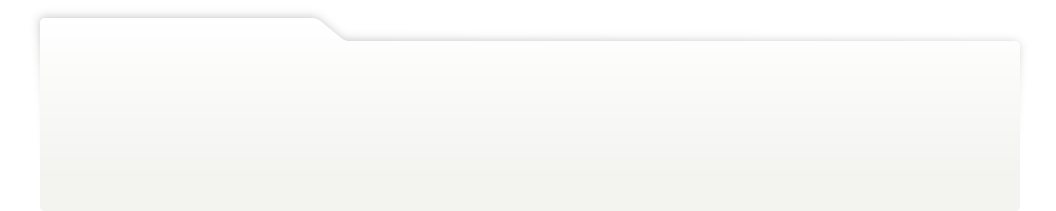
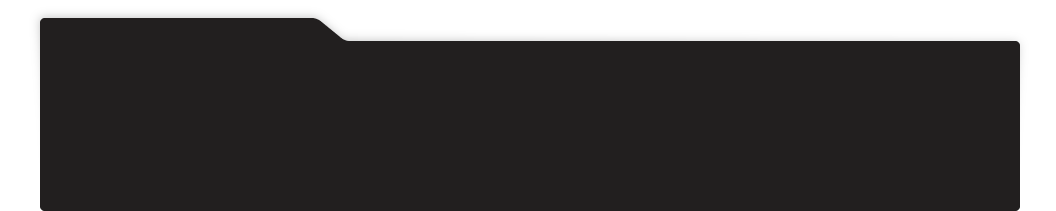
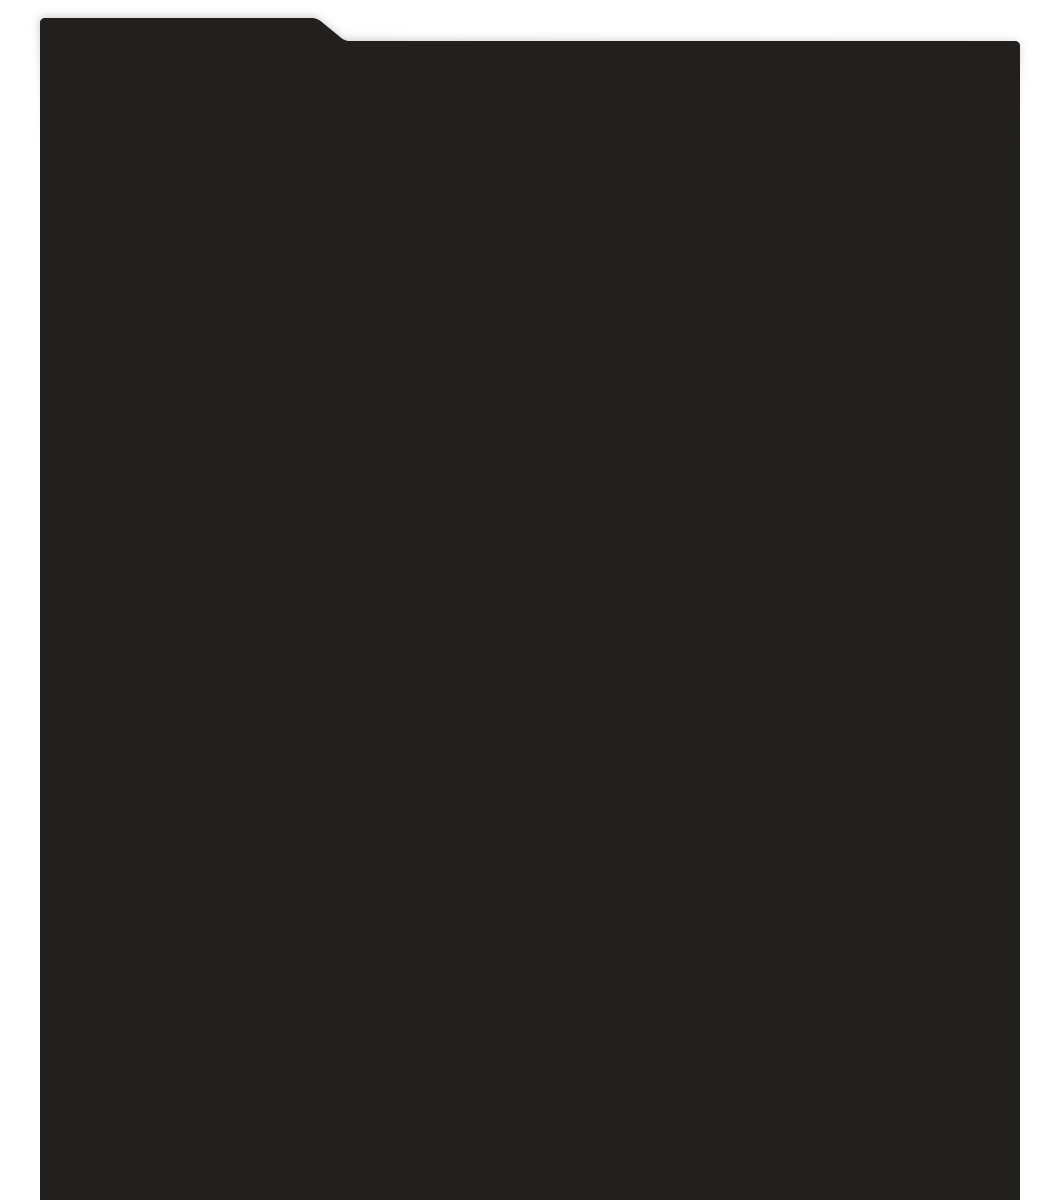
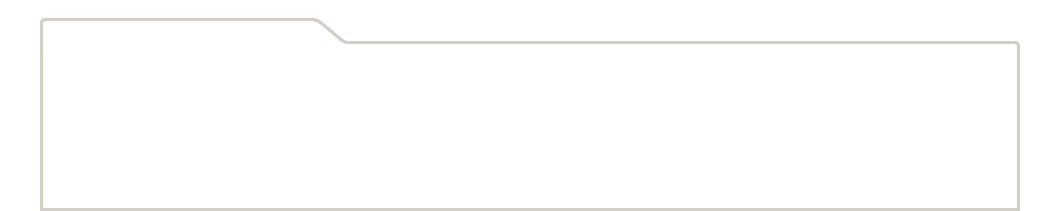
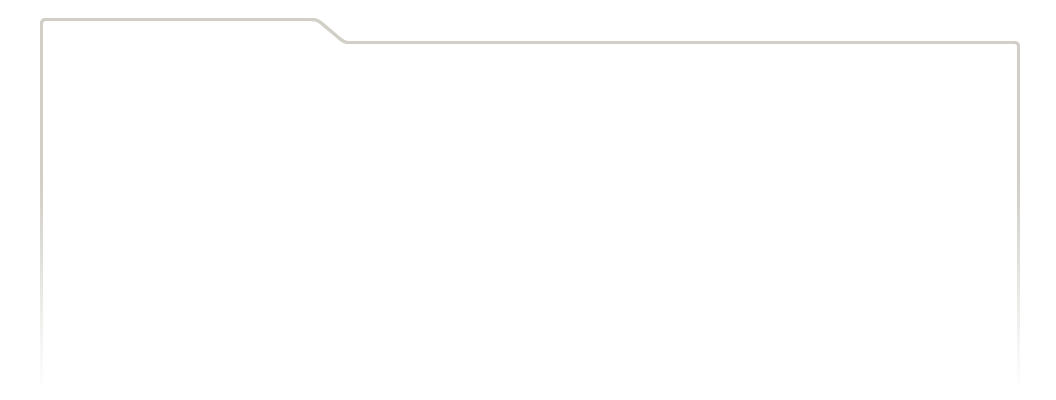
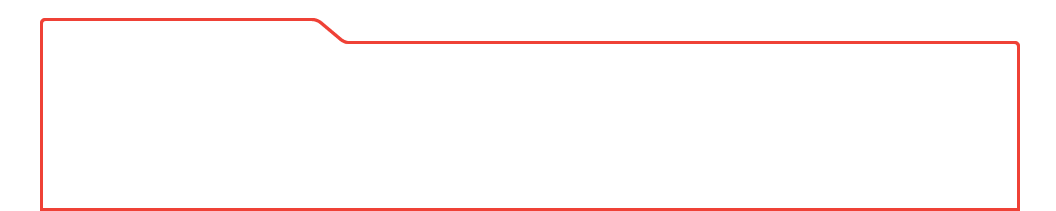
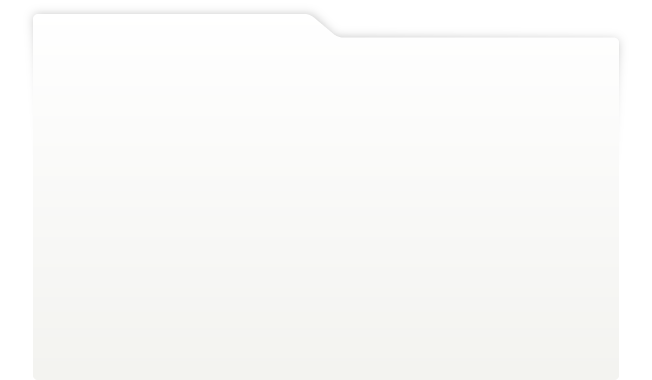
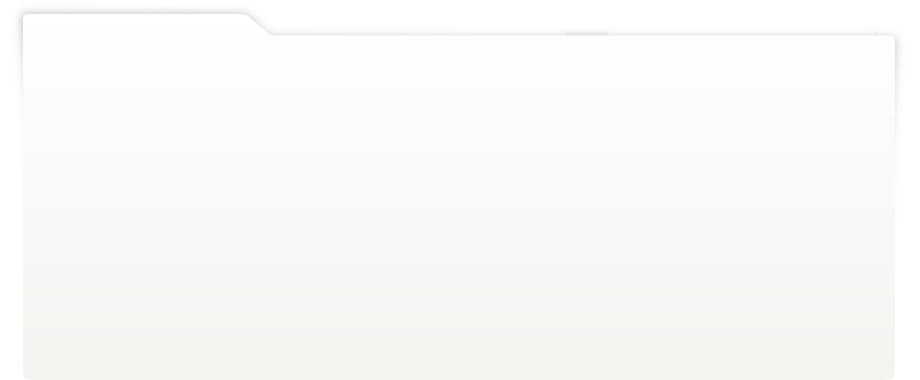
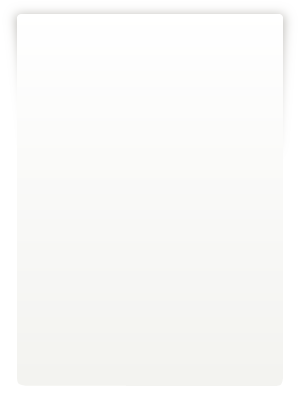
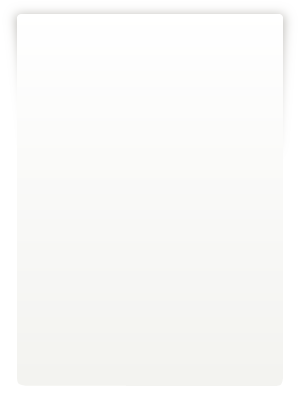
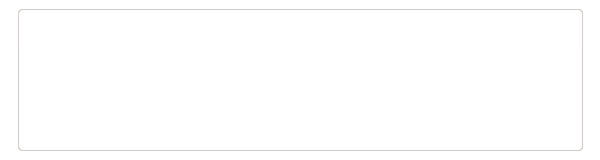
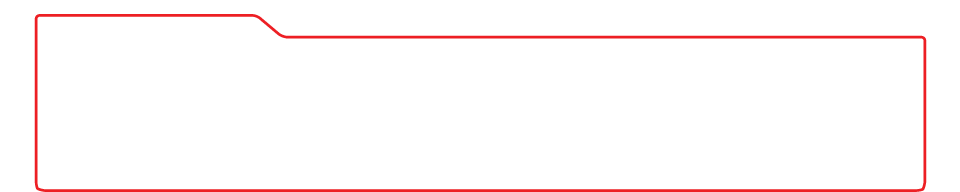
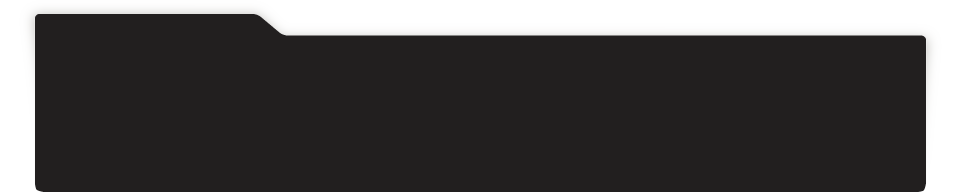
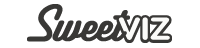
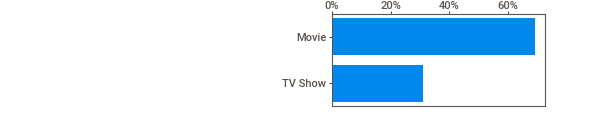
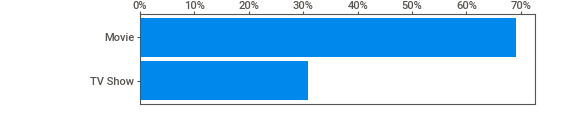
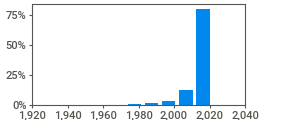
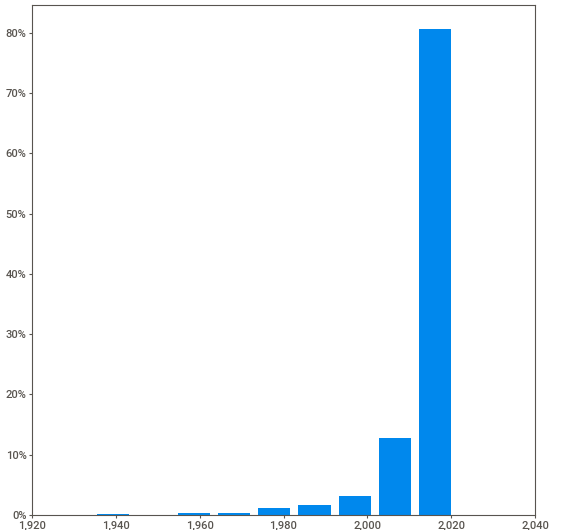
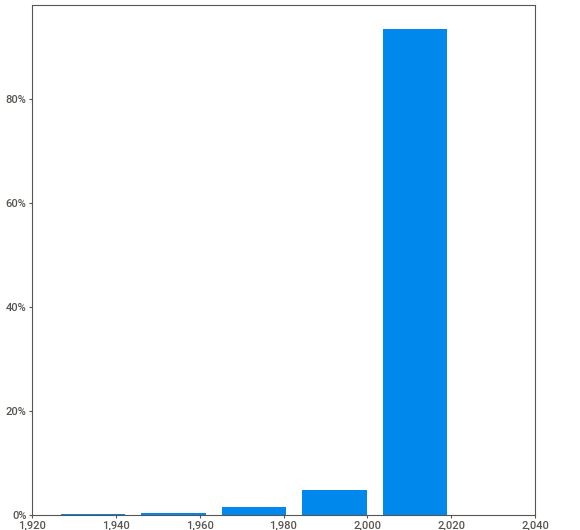
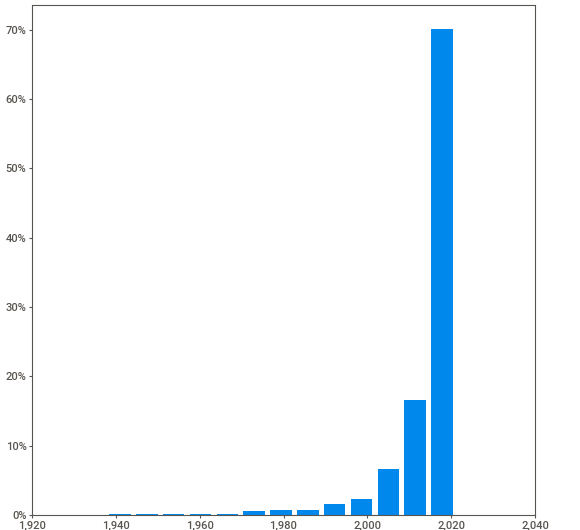
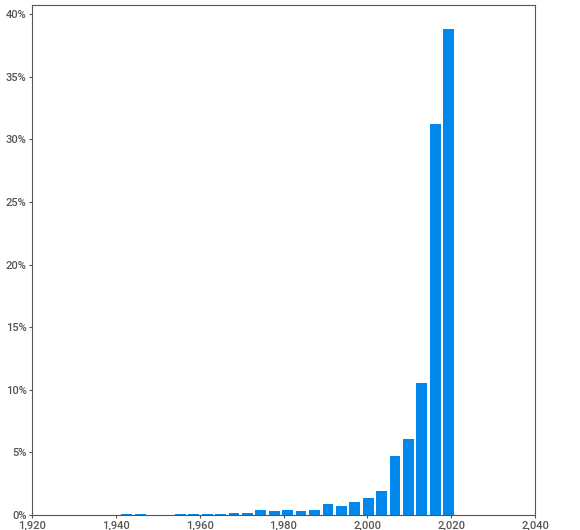
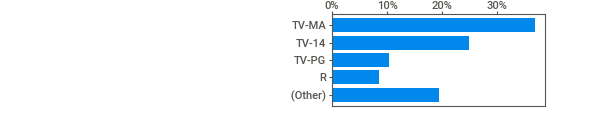
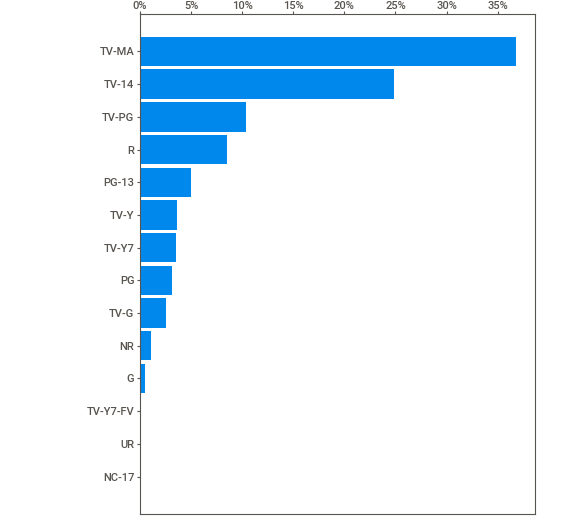
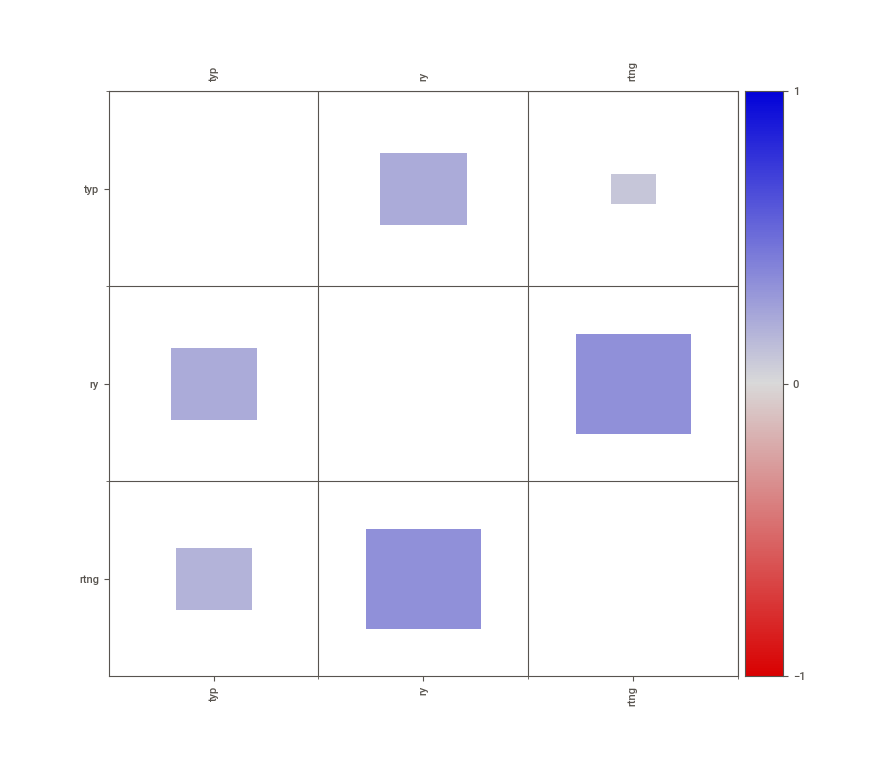
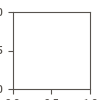

In [193]:
rep.show_html('rep.html') # Saving the report to an HTML file.

rep.show_notebook()       # Display the report in a Jupyter Notebook.

* ***Type :***

 * ***Our whole dataset comprises of 69 % Movies and 31 % TV Shows.***

* ***Country :***

 * ***39% of content (TV Shows and Movies) on the platform is from US.***

  * ***12% of content (TV Shows and Movies) on the platform is from India.***

  * ***5% of content (TV Shows and Movies) on the platform is from UK.***

* ***Released year :***

 * ***14.4% (1120) content(tv shows and movies) of our whole dataset was released in 2018.***

 * ***13% (1010) content(tv shows and movies) of our dataset was released in 2017.***
  
 * ***12.8% (996) content(tv shows and movies) of our dataset was released in 2019.***

 * ***It is showing 30% positive correlation with rating***

* ***Rating :***

 * ***Showing 13% correlation with 'type'.***

 * ***37% content (TV Shows and Movies) on the platform is rated TV - MA (Mature Audience).***

  * ***25% content (TV Shows and Movies) on the platform is rated TV - 14 (Content unsuitable for children under 14).***

  * ***10% content (TV Shows and Movies) on the platform is rated TV - PG (Parental Guidance).***

* ***Duration :***

 * ***21% TV Shows on the platform consist 1 season while 5% are of 2 seasons.***